In [86]:
import pip
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imported required libs 

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import contractions
import nltk 
import csv
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
import numpy  as np
import matplotlib as plt  
import seaborn as sns
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loaded Test and Train Data

In [88]:
Training_Data = pd.read_csv("Train.csv")
Testing_Data = pd.read_csv("Test1.csv")
print("Train And Test Data import Successfully")

Train And Test Data import Successfully


In [89]:
print("Train Data")
Training_Data.head(10)

Train Data


,Review,Sentiment
0,"Buffet is a disaster. No fresh food, all the d...",Negative
1,I have order veg sizzler but and they served m...,Negative
2,Been here with the team .. felt that itâ€™s a ...,Neutral
3,The ambience tells everything. The place remin...,Positive
4,Had pizza at near by pizza hut and badly wante...,Positive
5,The coffee at this place was one of the I ever...,Positive
6,Worst place to be on a Saturday evening. Servi...,Negative
7,I have been there here thrice. The food is sim...,Positive
8,"Excellent experience, mouthwatering food, good...",Positive
9,Had a great time here. I really love blazing s...,Positive


In [90]:
print("Test Data")
Testing_Data.head(10)

Test Data


,Review,Sentiment
0,.,Positive
1,"Service , Food and Ambiance was very nice. Sta...",Positive
2,Mathura vilas.....The food really justifies th...,Positive
3,food delivered was of very bad quality,Negative
4,"Boy oh boy , the prepossessing set up of rooft...",Positive
5,I was here with my pals for a lunch. We have t...,Positive
6,"Worst daal makhani, i have ever tasted in my l...",Negative
7,food is tasty..ðŸ˜‹,Positive
8,A lovely place with good ambience and friendly...,Positive
9,Have been for lunch. Honestly speaking had a g...,Neutral


# Counting rows and columns

In [91]:
print("Number of ROWS and COLUMNS = {}".format(Training_Data.shape))

Number of ROWS and COLUMNS = (3595, 2)


In [92]:
print("Number of ROWS and COLUMNS = {}".format(Testing_Data.shape))

Number of ROWS and COLUMNS = (969, 2)


# Checking null values 


In [93]:
Training_Data.isnull().any()

Review       False
Sentiment    False
dtype: bool

In [94]:
Testing_Data.isnull().any()

Review       False
Sentiment    False
dtype: bool

# Checking duplicates values

In [95]:
Training_Data.duplicated().any()

True

In [96]:
Training_Data.drop_duplicates(inplace=True)

In [97]:
Testing_Data.duplicated().any()

True

In [98]:
Testing_Data.drop_duplicates(inplace=True)

In [99]:

Null_vector_column = pd.isnull(Training_Data["Review"])
Training_Data[Null_vector_column]

,Review,Sentiment


In [100]:
Null_vector_column = pd.isnull(Testing_Data["Review"])
Testing_Data[Null_vector_column]

,Review,Sentiment


In [101]:
Testing_Data.dropna().any()

Review       True
Sentiment    True
dtype: bool

# Converting to lowercase

1.   List item
2.   List item




In [102]:
Training_Data['Review'] = Training_Data['Review'].str.lower()
Testing_Data['Review'] = Testing_Data['Review'].str.lower()

# Elemnation intigers and special chars

In [103]:
for index, row in Training_Data.iterrows():
  Training_Data.at[index, "Review"] = re.sub(r'[^A-Za-z ]+', '', row["Review"])
for index , row in Testing_Data.iterrows():
  Testing_Data.at[index, "Review"] = re.sub(r'[^A-Za-z ]+', '', row["Review"])

In [104]:
Training_Data['Review']

0       buffet is a disaster no fresh food all the des...
1       i have order veg sizzler but and they served m...
2       been here with the team  felt that its a not a...
3       the ambience tells everything the place remind...
4       had pizza at near by pizza hut and badly wante...
                              ...                        
3590    totally loved the cookies amazing cookies with...
3591    good food nice ambience a good place for a qui...
3592    excellent food and very good service by soumen...
3593    i ordered afghani chicken from here but i got ...
3594                                                 cool
Name: Review, Length: 3458, dtype: object

In [105]:
Testing_Data['Review']

0                                                       
1      service  food and ambiance was very nice staff...
2      mathura vilasthe food really justifies the nam...
3                 food delivered was of very bad quality
4      boy oh boy  the prepossessing set up of roofto...
                             ...                        
964    this place opened last year and is a small pla...
965    very rude staff ask them for corporate discoun...
966                  paneer parathas paneer was not good
967    they did not allow entry at pm today just sayi...
968    very nice food and very good sarvice very nice...
Name: Review, Length: 948, dtype: object

# Handling contraction



In [106]:
for index, row in Training_Data.iterrows():
  Training_Data.at[index, "Review"] = contractions.fix(row["Review"])
for index, row in Testing_Data.iterrows():
  Testing_Data.at[index, "Review"] = contractions.fix(row["Review"])

# Implementing  Tokenization

In [107]:
Token=RegexpTokenizer(r'[A-Za-z]+')
Training_Data['Review']=Training_Data['Review'].apply(lambda x:Token.tokenize(x.lower())) 
Testing_Data['Review']=Testing_Data['Review'].apply(lambda x:Token.tokenize(x.lower()))




```
# This is formatted as code
```

#Removing StopWords

In [108]:
nltk.download('stopwords')
def ElimStopWords(word):
    elim=[w for w in word if w not in stopwords.words('english')]
    return elim
Training_Data['Review']=Training_Data['Review'].apply(lambda x:ElimStopWords(x))
Testing_Data['Review']=Testing_Data['Review'].apply(lambda x:ElimStopWords(x))
Training_Data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Sentiment
0,"[buffet, disaster, fresh, food, deserts, previ...",Negative
1,"[order, veg, sizzler, served, non, veg, sizzle...",Negative
2,"[team, felt, place, buffet, starters, chicken,...",Neutral
3,"[ambience, tells, everything, place, reminds, ...",Positive
4,"[pizza, near, pizza, hut, badly, wanted, desse...",Positive


#Lemmatizer object

In [109]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [110]:
lemmatizer = WordNetLemmatizer()

for index, row in Training_Data.iterrows():
  lemmatized_words = [lemmatizer.lemmatize(word = x) for x in row["Review"]]
  Training_Data.at[index, "Review"] = lemmatized_words

for index, row in Testing_Data.iterrows():
  lemmatized_words = [lemmatizer.lemmatize(word = x) for x in row["Review"]]
  Testing_Data.at[index, "Review"] = lemmatized_words

In [111]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [112]:
Training_Data["Temp_Review"] = Training_Data["Review"]
Testing_Data["Temp_Review"] = Testing_Data["Review"]

is_noun = lambda pos: pos[:2] == 'NN'

for index, row in Training_Data.iterrows():
  nouns = [word for (word, pos) in nltk.pos_tag(row["Temp_Review"]) if is_noun(pos)]
  Training_Data.at[index, "Temp_Review"] = nouns
for index, row in Training_Data.iterrows():
  Training_Data.at[index, "Temp_Review"] = " ".join(row["Temp_Review"])
for index, row in Testing_Data.iterrows():
  Testing_Data.at[index, "Temp_Review"] = " ".join(row["Temp_Review"])

#Displaying nouns



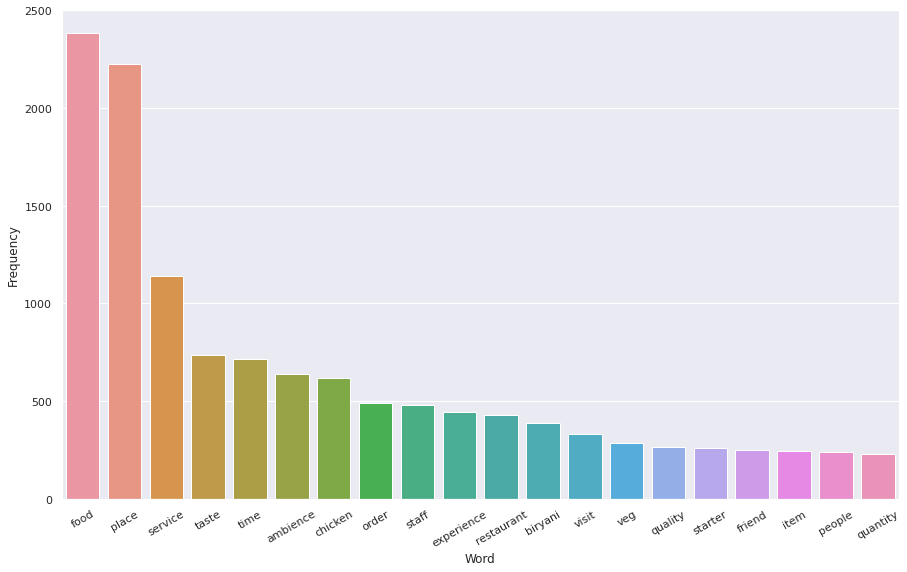

In [113]:
stop_words = set(stopwords.words("english"))
cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=1000, ngram_range=(1,4))

def get_top_n_words(review, n=None):
  vec = CountVectorizer().fit(review)
  bag_of_words = vec.transform(review)
  sum_words = bag_of_words.sum(axis=0)
  words_frequency = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

top_words = get_top_n_words(Training_Data["Temp_Review"], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Frequency"]

sns.set(rc={'figure.figsize':(15,9)})
g = sns.barplot(x="Word", y="Frequency", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

# TF-IDF Vectorization

In [114]:
vector_data=TfidfVectorizer(analyzer='word')

def WordJoin(word):
    wordJ=" ".join(i for i in word)
    return wordJ
    
Training_Data['Review']=Training_Data['Review'].apply(lambda x:WordJoin(x))
Testing_Data['Review']=Testing_Data['Review'].apply(lambda x:WordJoin(x))
vector_data.fit(Training_Data['Review'])

TfidfVectorizer()

# Training the Model

In [115]:
trainData_1=vector_data.transform(Training_Data['Review'])
testData_1=vector_data.transform(Testing_Data['Review'])
trainData_2=Training_Data['Sentiment']
testData_2=Testing_Data['Sentiment']

In [116]:
classifier=RandomForestClassifier()
classifier.fit(trainData_1,trainData_2)

RandomForestClassifier()

#Prediction

In [117]:
predict_Data=classifier.predict(testData_1)

#Accuracy

In [118]:
accuracy_score(testData_2,predict_Data)*100

78.48101265822784

# Precision

In [119]:
precision_score(testData_2,predict_Data,average='macro')

0.5247319326248004

#Recall

In [120]:
recall_score(testData_2,predict_Data,average='macro')

0.5606493506493506

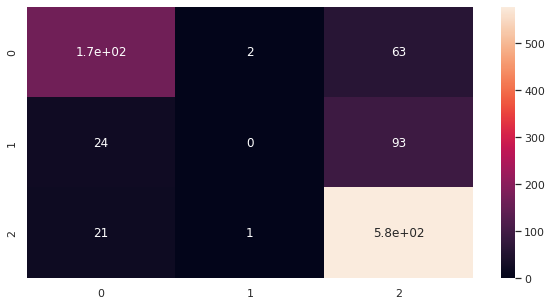

In [121]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(confusion_matrix(testData_2,predict_Data),annot=True)